In [1]:
import sys

import torch

import numpy as np
import matplotlib.pyplot as plt

checkpoint_filename = "../models/medium.bin"
checkpoint = torch.load(checkpoint_filename, map_location="cpu")

In [20]:
target = 'model.encoder.conv2.weight'
weight = checkpoint[target]
print(weight)

print('tensor ', target)
print('min', torch.min(weight))
print('max', torch.max(weight))
hist = torch.histogram(weight, bins=256)

tensor([[[-2.0065e-03,  3.6697e-03,  1.9722e-03],
         [ 2.7256e-03, -7.4310e-03, -3.0041e-03],
         [-1.7786e-03, -4.5800e-04, -2.1687e-03],
         ...,
         [ 2.9898e-04,  3.8700e-03,  3.3283e-03],
         [ 2.9926e-03,  6.3286e-03,  1.6522e-04],
         [ 1.9817e-03, -4.4060e-03,  2.4261e-03]],

        [[-1.2550e-02, -1.5869e-02, -1.5152e-02],
         [-1.0170e-02, -1.0918e-02, -1.4290e-02],
         [-8.0414e-03, -5.7716e-03, -7.3204e-03],
         ...,
         [-1.3680e-02, -1.4656e-02, -1.4702e-02],
         [-9.7427e-03, -1.0345e-02, -1.1520e-02],
         [-1.8890e-02, -1.9089e-02, -1.6495e-02]],

        [[-9.5034e-04, -2.9697e-03, -6.9275e-03],
         [-9.1457e-04,  7.5936e-05,  5.1651e-03],
         [-2.5902e-03,  1.5736e-03,  8.4686e-04],
         ...,
         [ 1.0353e-02,  1.4809e-02,  9.9640e-03],
         [ 5.1193e-03, -6.9466e-03, -2.4433e-03],
         [-3.3054e-03, -3.1719e-03, -1.2703e-03]],

        ...,

        [[ 1.1520e-02, -8.6517e-03,  1

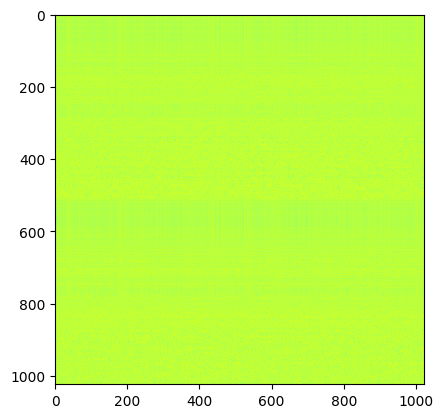

In [13]:
plt.imshow(weight[:,:, 2], cmap='jet')

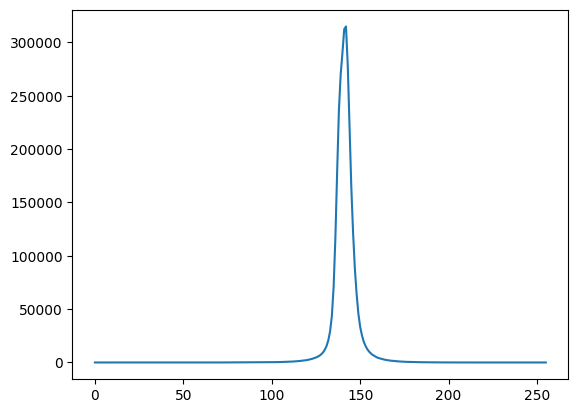

In [24]:
plt.plot(hist.hist)

In [22]:
hist

torch.return_types.histogram(
hist=tensor([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 6.0000e+00, 5.0000e+00, 6.0000e+00, 2.0000e+00,
        9.0000e+00, 5.0000e+00, 6.0000e+00, 8.0000e+00, 5.0000e+00, 9.0000e+00,
        9.0000e+00, 5.0000e+00, 1.2000e+01, 7.0000e+00, 1.2000e+01, 1.1000e+01,
        1.4000e+01, 6.0000e+00, 1.2000e+01, 1.9000e+01, 1.1000e+01, 1.5000e+01,
        1.3000e+01, 1.7000e+01, 1.8000e+01, 2.2000e+01, 1.1000e+01, 2.4000e+01,
     

In [26]:
for k in checkpoint.keys():
    print(checkpoint[k].shape, k)

torch.Size([1024, 80, 3]) model.encoder.conv1.weight
torch.Size([1024]) model.encoder.conv1.bias
torch.Size([1024, 1024, 3]) model.encoder.conv2.weight
torch.Size([1024]) model.encoder.conv2.bias
torch.Size([1500, 1024]) model.encoder.embed_positions.weight
torch.Size([1024, 1024]) model.encoder.layers.0.self_attn.k_proj.weight
torch.Size([1024, 1024]) model.encoder.layers.0.self_attn.v_proj.weight
torch.Size([1024]) model.encoder.layers.0.self_attn.v_proj.bias
torch.Size([1024, 1024]) model.encoder.layers.0.self_attn.q_proj.weight
torch.Size([1024]) model.encoder.layers.0.self_attn.q_proj.bias
torch.Size([1024, 1024]) model.encoder.layers.0.self_attn.out_proj.weight
torch.Size([1024]) model.encoder.layers.0.self_attn.out_proj.bias
torch.Size([1024]) model.encoder.layers.0.self_attn_layer_norm.weight
torch.Size([1024]) model.encoder.layers.0.self_attn_layer_norm.bias
torch.Size([4096, 1024]) model.encoder.layers.0.fc1.weight
torch.Size([4096]) model.encoder.layers.0.fc1.bias
torch.Size

In [29]:
def plot_hist(weight, bins=256):
    hist = torch.histogram(weight, bins=bins)

    plt.plot(hist.hist)

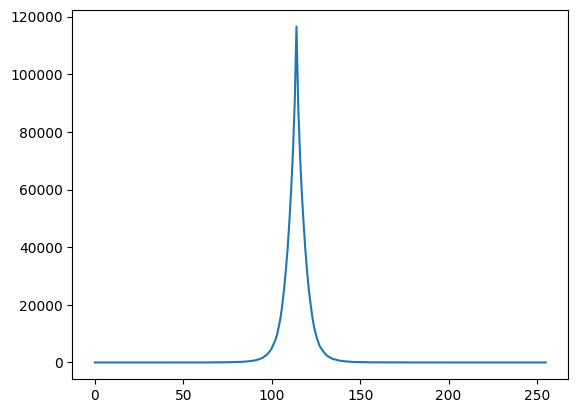

In [38]:
plot_hist(checkpoint['model.encoder.layers.1.self_attn.k_proj.weight'])

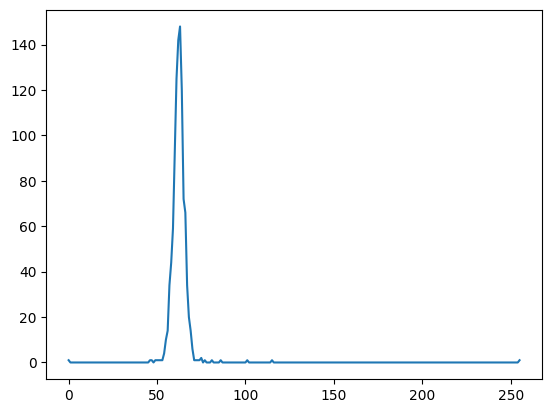

In [43]:
for k in checkpoint.keys():
    w = checkpoint[k]
    plt.clf()
    plot_hist(w)
    plt.savefig("{}-hist.png".format(k))
    #plt.imshow(checkpoint['model.encoder.layers.1.self_attn.k_proj.weight'], cmap='tab10')
    #plt.colorbar(
    #)

In [45]:
from pyzfp import compress, decompress

In [72]:
tolerance=1e-4

In [48]:
nw = weight.numpy()

In [49]:
print(nw

(1024, 1024, 3)


In [73]:
compressed = compress(nw, tolerance=tolerance)

In [74]:
print(len(compressed))

7292400


In [57]:
print(len(nw.tobytes()))

12582912


In [70]:
recovered = decompress(compressed, nw.shape, nw.dtype, tolerance=tolerance)

In [71]:
np.linalg.norm(recovered-nw)

0.0006052473